# **Exit Test Coding Competition**


# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# **Importing Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/DSA Final Coding test/data_car.csv')
df.head(2)

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   

   highway MPG  city mpg  Popularity   MSRP  
0           26        19        3916  46135  
1           28        19        3916  40650

# **EDA**

In [4]:
df.shape

(11914, 16)

In [5]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [7]:
df.describe()

Year    Engine HP  Engine Cylinders  Number of Doors  \
count  11914.000000  11845.00000      11884.000000     11908.000000   
mean    2010.384338    249.38607          5.628829         3.436093   
std        7.579740    109.19187          1.780559         0.881315   
min     1990.000000     55.00000          0.000000         2.000000   
25%     2007.000000    170.00000          4.000000         2.000000   
50%     2015.000000    227.00000          6.000000         4.000000   
75%     2016.000000    300.00000          6.000000         4.000000   
max     2017.000000   1001.00000         16.000000         4.000000   

        highway MPG      city mpg    Popularity          MSRP  
count  11914.000000  11914.000000  11914.000000  1.191400e+04  
mean      26.637485     19.733255   1554.911197  4.059474e+04  
std        8.863001      8.987798   1441.855347  6.010910e+04  
min       12.000000      7.000000      2.000000  2.000000e+03  
25%       22.000000     16.000000    549.000000  2.100000e+04  
50%       26.000000     18.000000   1385.000000  2.999500e+04  
75%       30.000000     22.000000   2009.000000  4.223125e+04  
max      354.000000    137.000000   5657.000000  2.065902e+06

In [8]:
#Unique Value Check: 

df.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

### **Univariate Analysis**

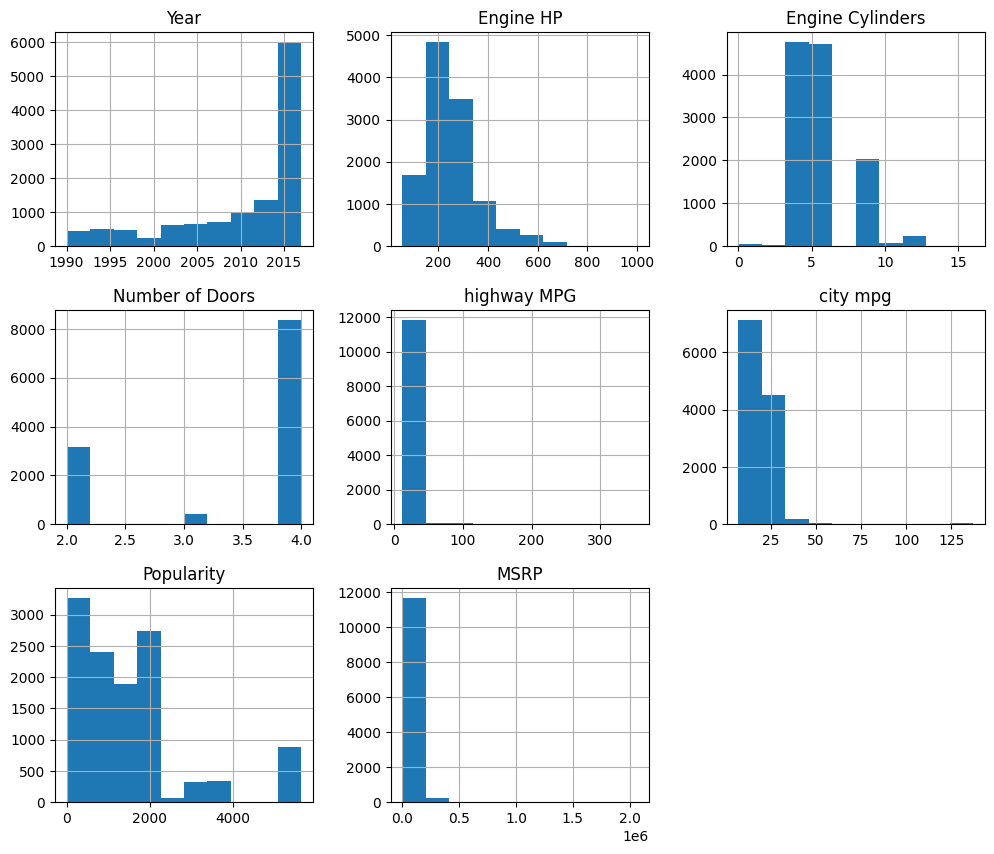

In [9]:
#Histograms
freqgraph = df.select_dtypes(include=['int64','float64'])
freqgraph.hist(figsize=(12,10))
plt.show()

#### **Distribution Plots**

<Axes: xlabel='Engine HP', ylabel='Density'>

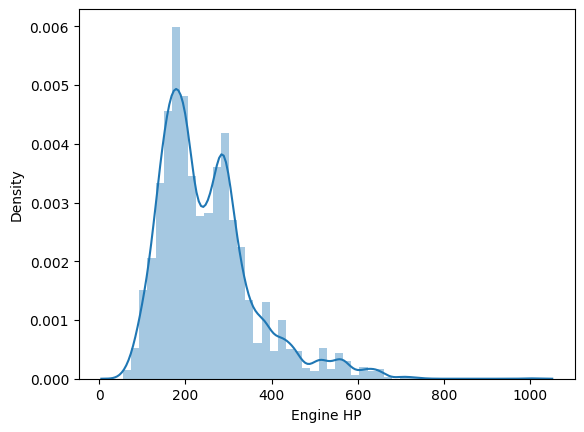

In [10]:
sns.distplot(df['Engine HP'])

<Axes: xlabel='highway MPG', ylabel='Density'>

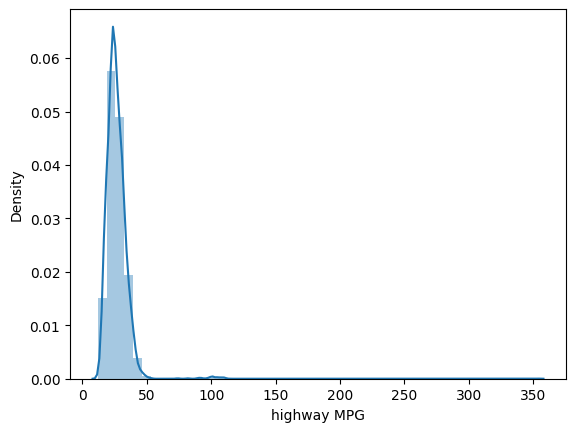

In [11]:
sns.distplot(df['highway MPG'])

<Axes: xlabel='city mpg', ylabel='Density'>

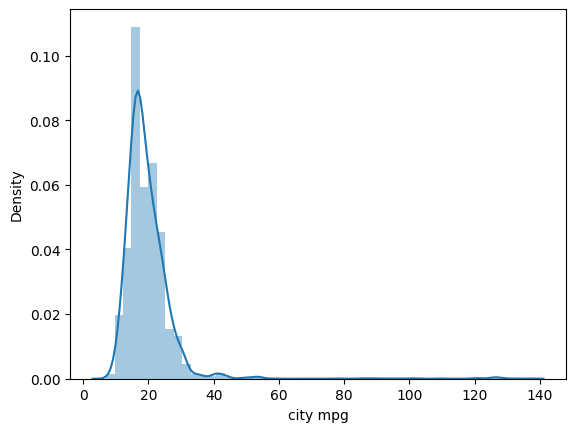

In [12]:
sns.distplot(df['city mpg'])

<Axes: xlabel='Popularity', ylabel='Density'>

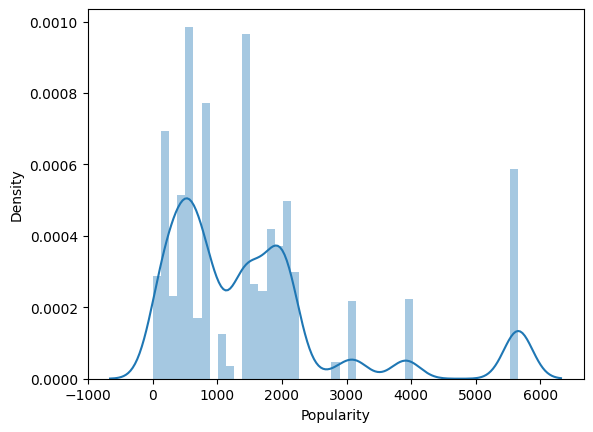

In [13]:
sns.distplot(df['Popularity'])

<Axes: xlabel='MSRP', ylabel='Density'>

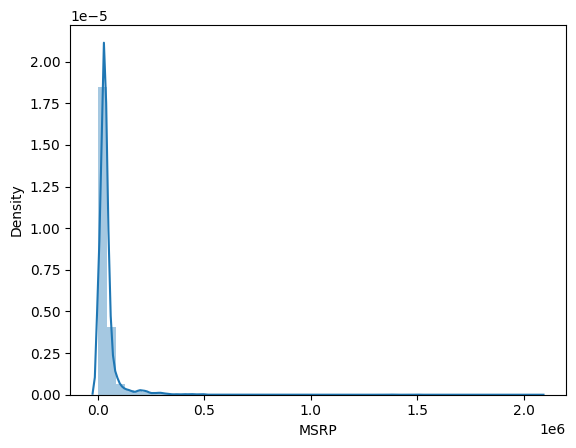

In [14]:
sns.distplot(df['MSRP'])

#### **Count Plots**

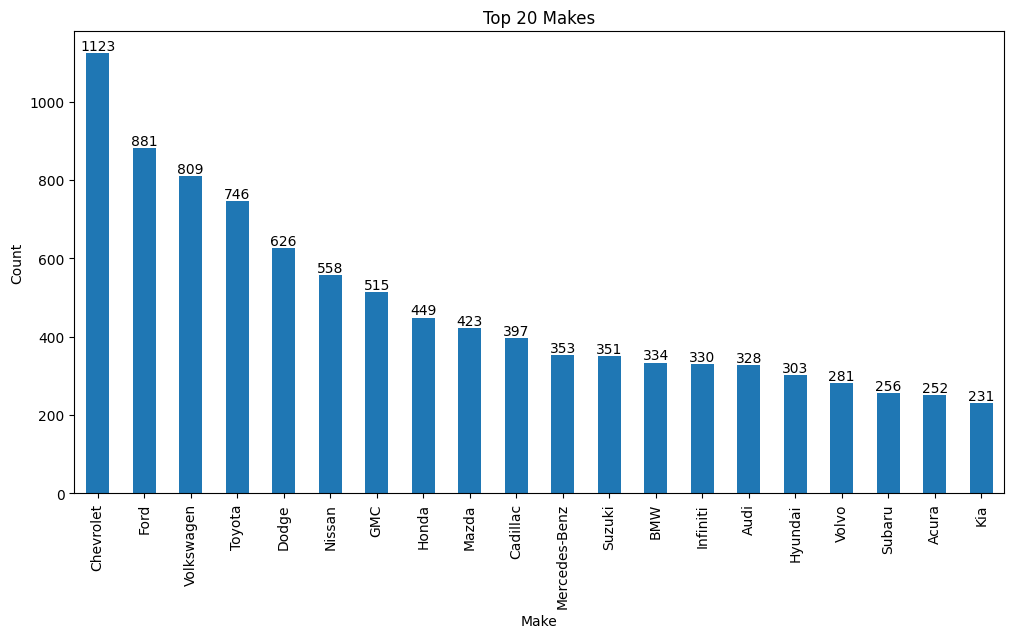

In [15]:
#Make - Top 20

top_20 = df['Make'].value_counts().head(20)
plt.figure(figsize=(12, 6))
top_20.plot(kind='bar')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), p.get_height(), ha='center', va='bottom')
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Top 20 Makes')
plt.show()

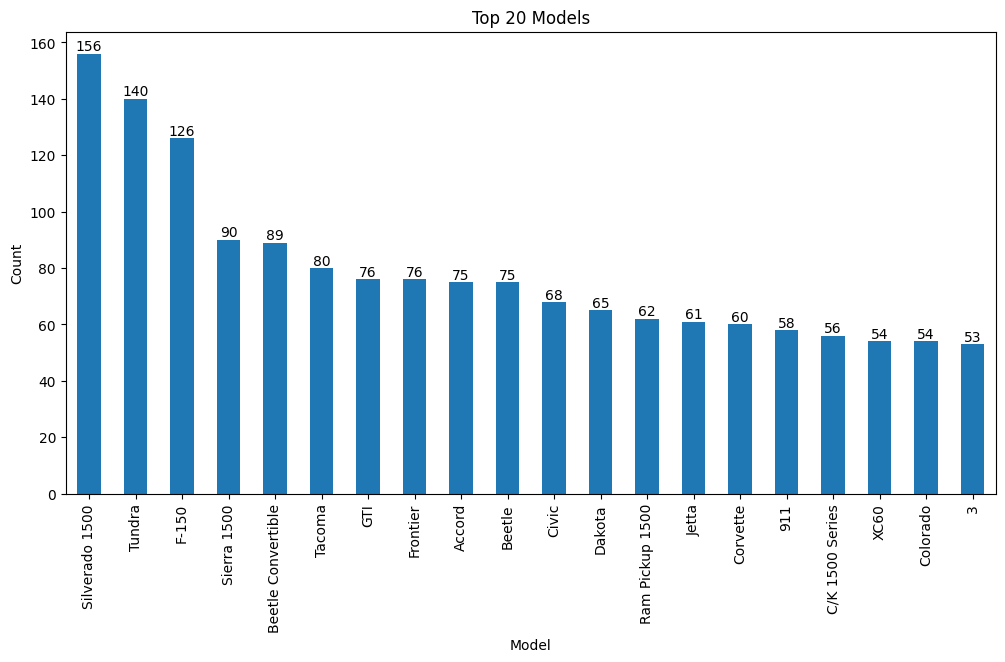

In [16]:
#Model - Top 20

top_20 = df['Model'].value_counts().head(20)
plt.figure(figsize=(12, 6))
top_20.plot(kind='bar')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), p.get_height(), ha='center', va='bottom')
plt.xlabel('Model')
plt.ylabel('Count')
plt.title('Top 20 Models')
plt.show()

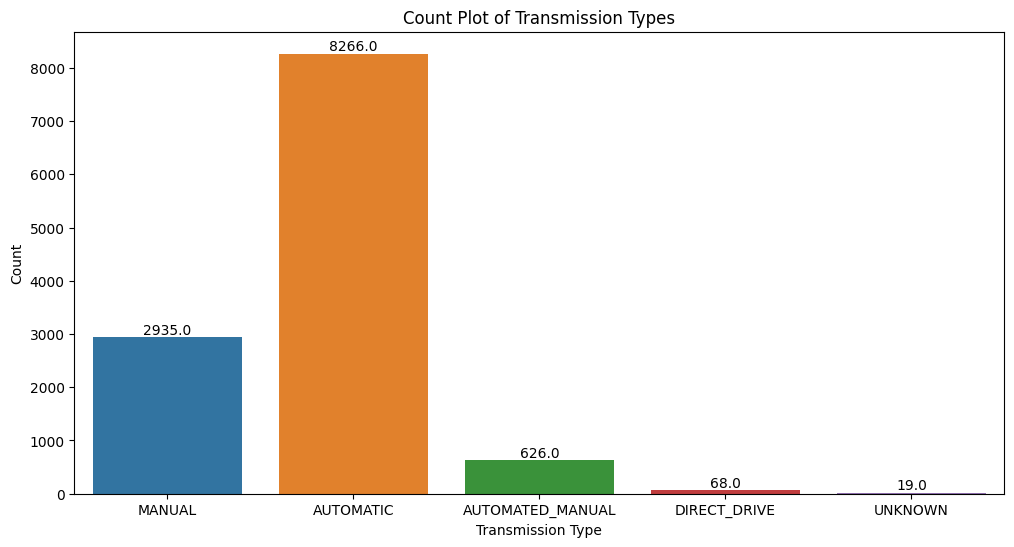

In [17]:
#Transmission Type

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Transmission Type')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), p.get_height(), ha='center', va='bottom')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.title('Count Plot of Transmission Types')
plt.show()

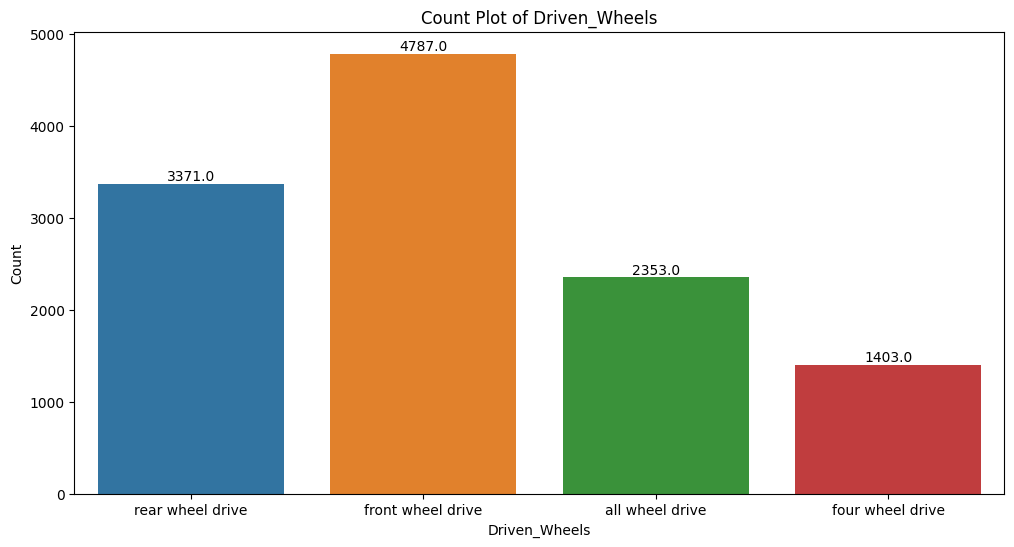

In [18]:
#Driven_Wheels

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Driven_Wheels')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), p.get_height(), ha='center', va='bottom')
plt.xlabel('Driven_Wheels')
plt.ylabel('Count')
plt.title('Count Plot of Driven_Wheels')
plt.show()

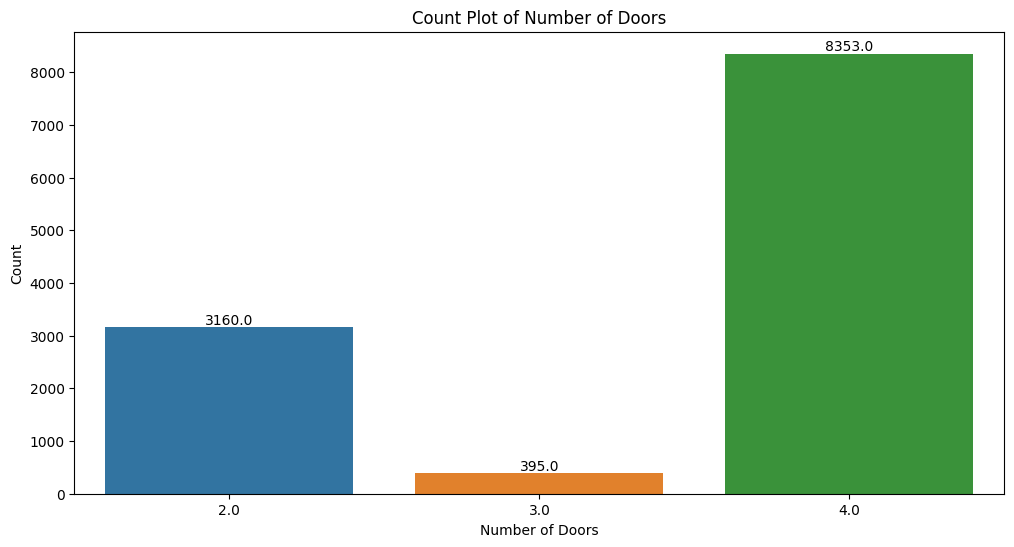

In [19]:
#Number of Doors

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Number of Doors')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), p.get_height(), ha='center', va='bottom')
plt.xlabel('Number of Doors')
plt.ylabel('Count')
plt.title('Count Plot of Number of Doors')
plt.show()

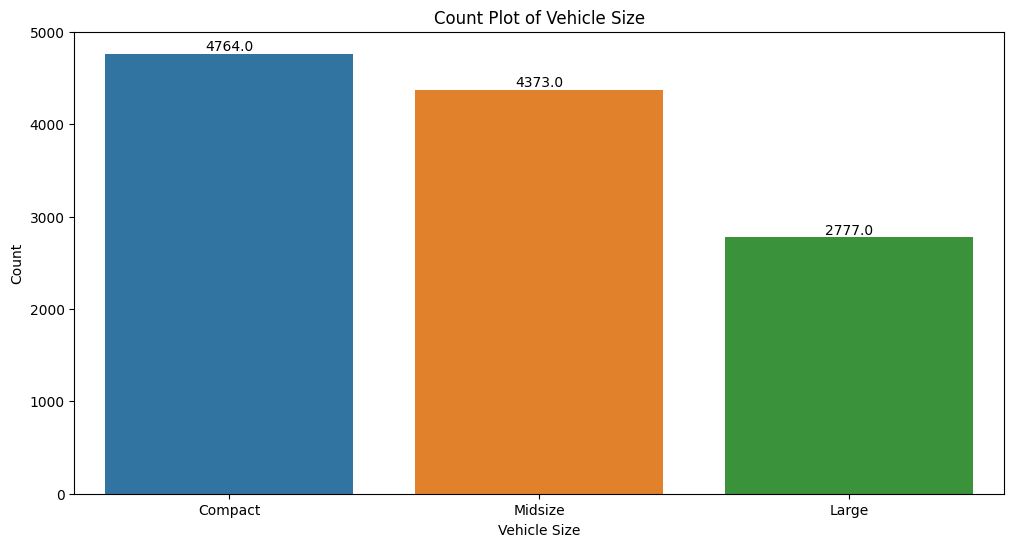

In [20]:
#Vehicle size

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Vehicle Size')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), p.get_height(), ha='center', va='bottom')
plt.xlabel('Vehicle Size')
plt.ylabel('Count')
plt.title('Count Plot of Vehicle Size')
plt.show()

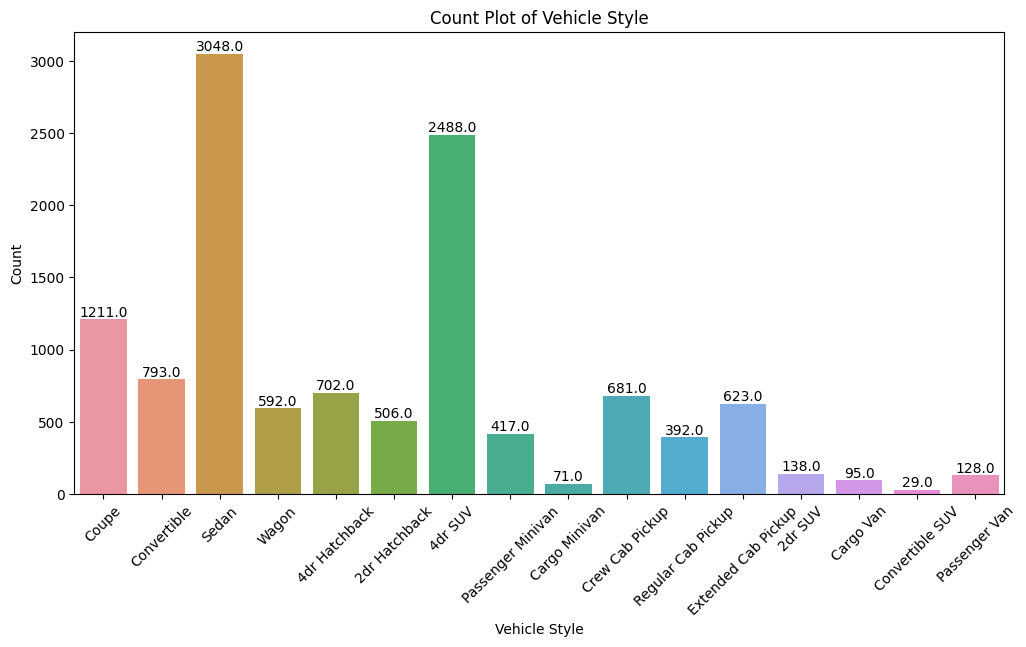

In [21]:
#Vehicle Style

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Vehicle Style')
plt.xticks(rotation=45)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), p.get_height(), ha='center', va='bottom')
plt.xlabel('Vehicle Style')
plt.ylabel('Count')
plt.title('Count Plot of Vehicle Style')
plt.show()

### **Bivariate Analysis**

In [22]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Scatter(x=df['MSRP'], y=df['Popularity'], mode='markers', marker=dict(size=8, opacity=0.5)))
fig.update_layout(
    title='Scatter Plot: MSRP vs Popularity',
    xaxis=dict(title='MSRP'),
    yaxis=dict(title='Popularity')
)

fig.show()

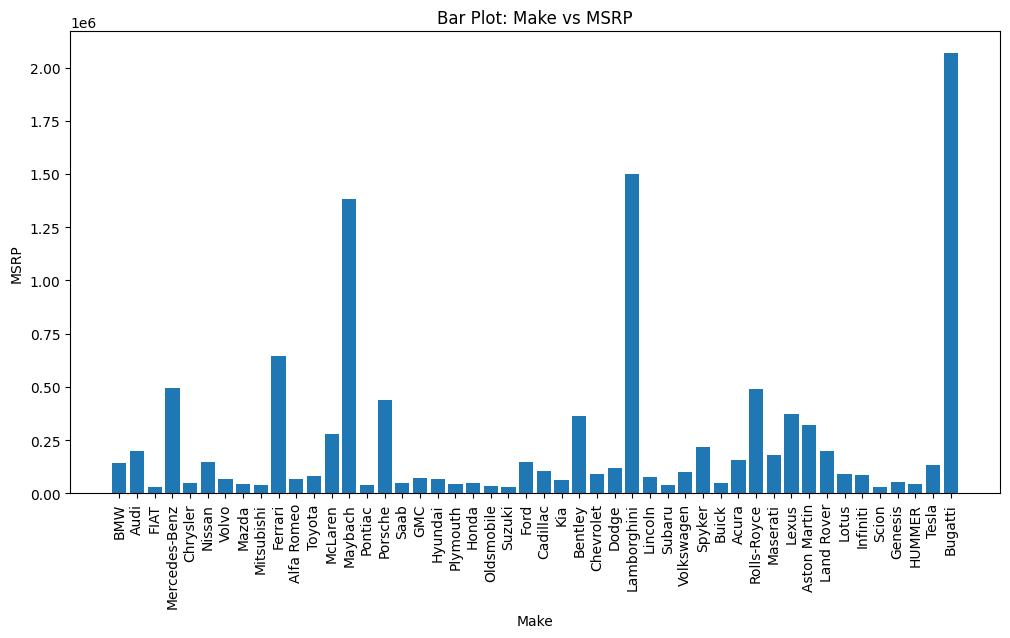

In [23]:
#MSRP Vs Make

plt.figure(figsize=(12, 6))
plt.bar(df['Make'], df['MSRP'])
plt.xlabel('Make')
plt.ylabel('MSRP')
plt.title('Bar Plot: Make vs MSRP')
plt.xticks(rotation=90)
plt.show()

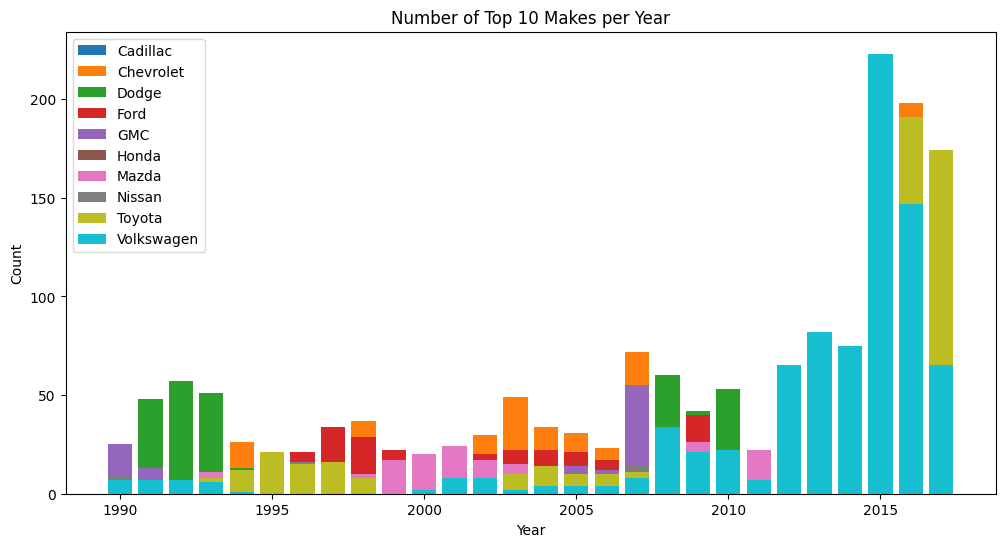

In [24]:
#Makes Vs Year

#Top 10 makes
topmakes = df['Make'].value_counts().head(10).index
filtered_df = df[df['Make'].isin(topmakes)]

#Grouping Year and Make
makes_per_year = filtered_df.groupby('Year')['Make'].value_counts().unstack()

plt.figure(figsize=(12, 6))
for make in makes_per_year.columns:
    plt.bar(makes_per_year.index, makes_per_year[make], label=make)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Top 10 Makes per Year')
plt.legend()
plt.show()


<Axes: >

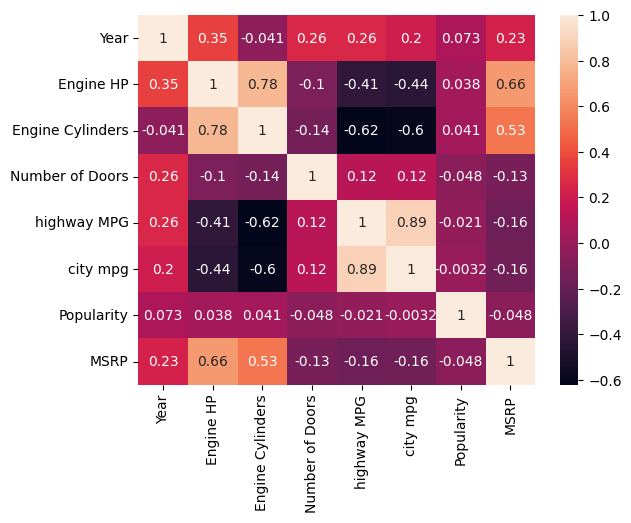

In [25]:
corr = df.corr()
sns.heatmap(corr, annot = True)

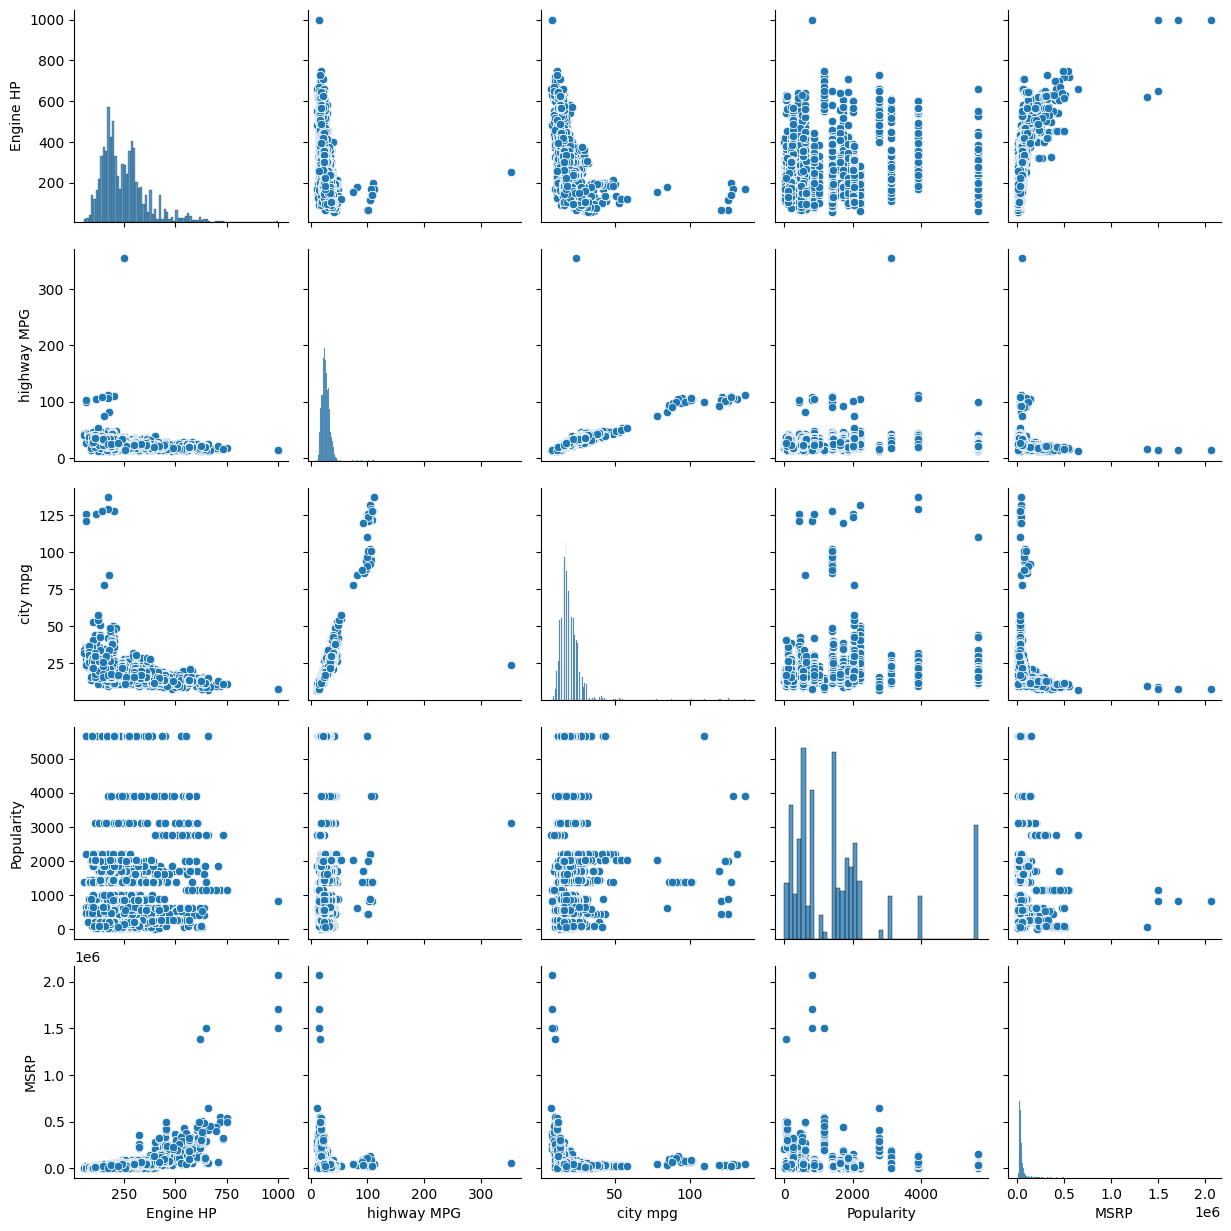

In [26]:
#Pair Plot

columns_to_plot = ['Engine HP', 'highway MPG', 'city mpg', 'Popularity','MSRP']
data_subset = df[columns_to_plot]
sns.pairplot(data_subset)

## **Data Preprocessing**

In [27]:
#Null Value Check:

df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [28]:
#Duplicated Value Check:

df.duplicated().sum()

715

In [29]:
duplicated = df[df.duplicated()].index.tolist()
duplicated

[14,
 18,
 20,
 24,
 25,
 88,
 92,
 94,
 109,
 126,
 137,
 141,
 252,
 413,
 414,
 431,
 432,
 435,
 436,
 677,
 741,
 742,
 753,
 775,
 778,
 783,
 787,
 788,
 789,
 901,
 903,
 913,
 916,
 919,
 987,
 988,
 1283,
 1470,
 1755,
 1756,
 1757,
 1758,
 1759,
 1761,
 1762,
 1763,
 1764,
 1768,
 1770,
 1773,
 1775,
 1776,
 1802,
 1804,
 1806,
 1807,
 1810,
 1811,
 1812,
 1813,
 1816,
 1818,
 1819,
 1820,
 1830,
 1837,
 1841,
 1842,
 1844,
 1845,
 1847,
 1848,
 1851,
 1853,
 1856,
 1857,
 1858,
 1859,
 1860,
 1865,
 1871,
 1872,
 1874,
 1875,
 1876,
 1877,
 1878,
 1879,
 1880,
 1888,
 1889,
 1890,
 1899,
 1905,
 1908,
 1909,
 1911,
 1914,
 1915,
 1916,
 1917,
 1918,
 1919,
 1920,
 1924,
 1925,
 1926,
 1928,
 1929,
 1936,
 1939,
 1940,
 1942,
 1944,
 1945,
 1946,
 1947,
 1948,
 2019,
 2021,
 2024,
 2026,
 2027,
 2028,
 2029,
 2030,
 2043,
 2118,
 2124,
 2125,
 2127,
 2245,
 2252,
 2262,
 2313,
 2397,
 2400,
 2401,
 2402,
 2403,
 2409,
 2410,
 2412,
 2413,
 2415,
 2416,
 2417,
 2418,
 2420,
 

In [30]:
df.loc[[14, 18]]

Make     Model  Year             Engine Fuel Type  Engine HP  \
14   BMW  1 Series  2013  premium unleaded (required)      230.0   
18  Audi       100  1992             regular unleaded      172.0   

    Engine Cylinders Transmission Type      Driven_Wheels  Number of Doors  \
14               6.0            MANUAL   rear wheel drive              2.0   
18               6.0            MANUAL  front wheel drive              4.0   

       Market Category Vehicle Size Vehicle Style  highway MPG  city mpg  \
14  Luxury,Performance      Compact         Coupe           28        19   
18              Luxury      Midsize         Sedan           24        17   

    Popularity   MSRP  
14        3916  31500  
18        3105   2000

In [31]:
#Zero Value check:

(df == 0).any()


Make                 False
Model                False
Year                 False
Engine Fuel Type     False
Engine HP            False
Engine Cylinders      True
Transmission Type    False
Driven_Wheels        False
Number of Doors      False
Market Category      False
Vehicle Size         False
Vehicle Style        False
highway MPG          False
city mpg             False
Popularity           False
MSRP                 False
dtype: bool

In [32]:
(df['Engine Cylinders'] == 0).sum()

56

In [33]:
#Dropping Zero Values from the column Engine Cylinders

df = df[df['Engine Cylinders'] != 0]
(df['Engine Cylinders'] == 0).sum()

0

### **Missing Value Handling**

In [34]:
#Engine Fuel Type

df['Engine Fuel Type'].fillna(df['Engine Fuel Type'].mode()[0], inplace=True)

In [35]:
#Engine HP

df['Engine HP'].fillna(df['Engine HP'].mean(), inplace=True)

In [36]:
#Engine Cylinders

df['Engine Cylinders'].fillna(df['Engine Cylinders'].median(), inplace=True)

In [37]:
#Number of Doors

df['Number of Doors'].fillna(df['Number of Doors'].mode()[0], inplace=True)

In [38]:
#Market category: Backward - Forward filling

df["Market Category"].fillna(method="backfill", inplace=True)  
df["Market Category"].fillna(method="pad", inplace=True)


In [39]:
df.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

### **Feature Enginieering**

In [40]:
#Split the 'Market Category' column
df['Market Category'] = df['Market Category'].str.split().str[0]

In [41]:
df['Market Category'].nunique()

48

### **Outlier Checking and Handling**

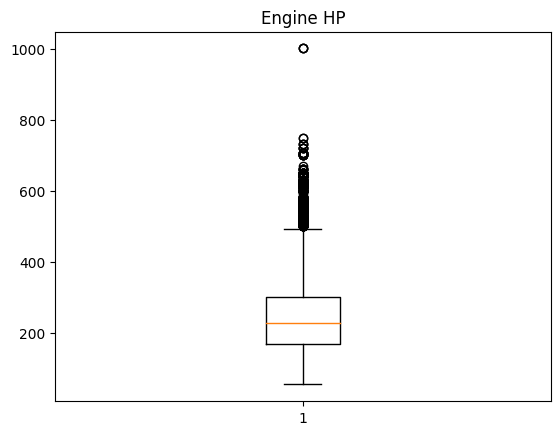

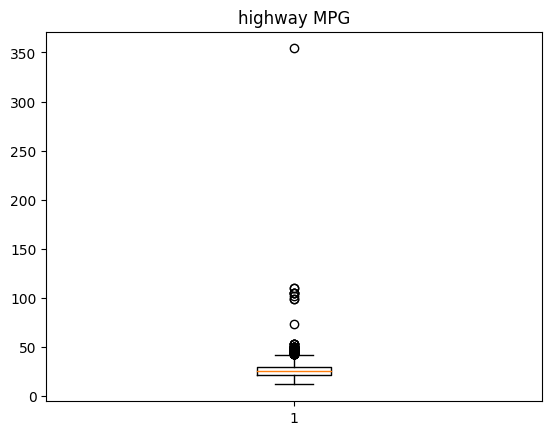

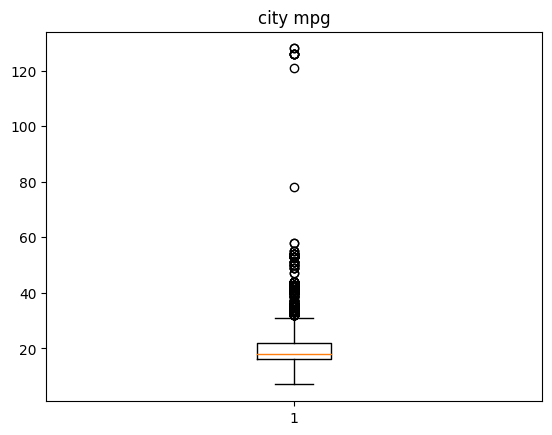

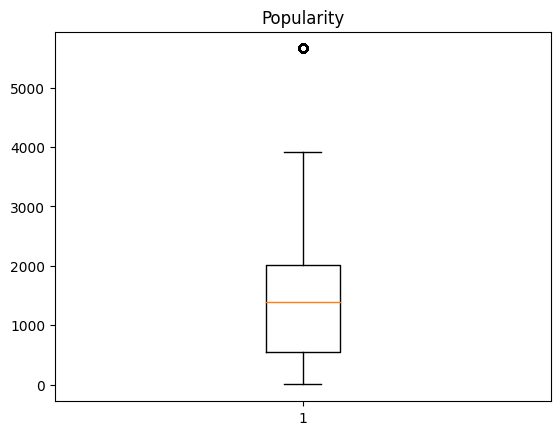

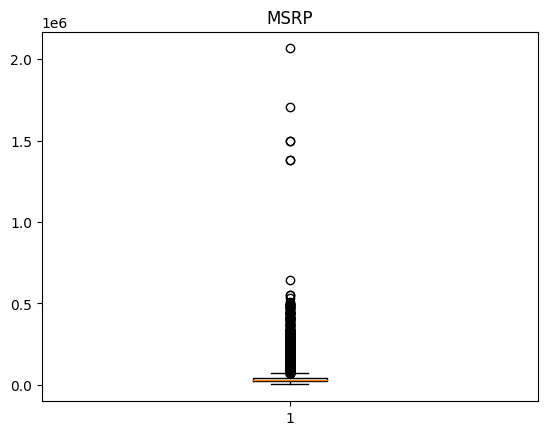

In [42]:
#Outlier Check : Boxplot

for i in ['Engine HP', 'highway MPG', 'city mpg', 'Popularity','MSRP']:
    plt.figure 
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [43]:
import plotly.graph_objects as go
fig = go.Figure()
for col in df:
  fig.add_trace(go.Box(y=df[col].values, name=df[col].name))
fig

In [44]:
#Outlier Removal
num_cols = ['Engine HP', 'highway MPG', 'city mpg', 'Popularity','MSRP']

#IQR for each column
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

#Lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Rows containing outliers
outliers = ((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)).any(axis=1)
df = df[~outliers]

In [45]:
df.shape

(9710, 16)

In [46]:
df.describe()

Year    Engine HP  Engine Cylinders  Number of Doors  \
count  9710.000000  9710.000000       9710.000000      9710.000000   
mean   2009.979300   228.148543          5.361998         3.488774   
std       7.804378    77.835381          1.396056         0.857211   
min    1990.000000    66.000000          3.000000         2.000000   
25%    2006.000000   170.000000          4.000000         3.000000   
50%    2014.000000   210.000000          6.000000         4.000000   
75%    2016.000000   285.000000          6.000000         4.000000   
max    2017.000000   485.000000         12.000000         4.000000   

       highway MPG     city mpg   Popularity          MSRP  
count  9710.000000  9710.000000  9710.000000   9710.000000  
mean     26.566735    19.359423  1198.455613  28720.980947  
std       5.750452     4.359615   851.029954  16057.734374  
min      12.000000    10.000000    21.000000   2000.000000  
25%      23.000000    16.000000   549.000000  19971.250000  
50%      26.000000    19.000000   873.000000  28460.000000  
75%      31.000000    22.000000  1851.000000  38600.000000  
max      42.000000    31.000000  3916.000000  73850.000000

#### **Encoding**

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
#Label Encoding of Categorical columns

cat_cols = ['Make', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style','Model']
label_encoder = LabelEncoder()
for column in cat_cols:
    df[column] = label_encoder.fit_transform(df[column])

### **Scaling**

In [49]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [50]:
cols = ['Engine HP', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']

# Perform standard scaling
scaler = StandardScaler()
df[cols] = scaler.fit_transform(df[cols])

# Perform min-max scaling
min_max_scaler = MinMaxScaler()
df[cols] = min_max_scaler.fit_transform(df[cols])

df.head(2)

Make  Model  Year  Engine Fuel Type  Engine HP  Engine Cylinders  \
0     3      1  2011                 7   0.642005               6.0   
1     3      0  2011                 7   0.558473               6.0   

   Transmission Type  Driven_Wheels  Number of Doors  Market Category  \
0                  2              3              2.0               24   
1                  2              3              2.0               39   

   Vehicle Size  Vehicle Style  highway MPG  city mpg  Popularity      MSRP  
0             0              8     0.466667  0.428571         1.0  0.614266  
1             0              6     0.533333  0.428571         1.0  0.537926

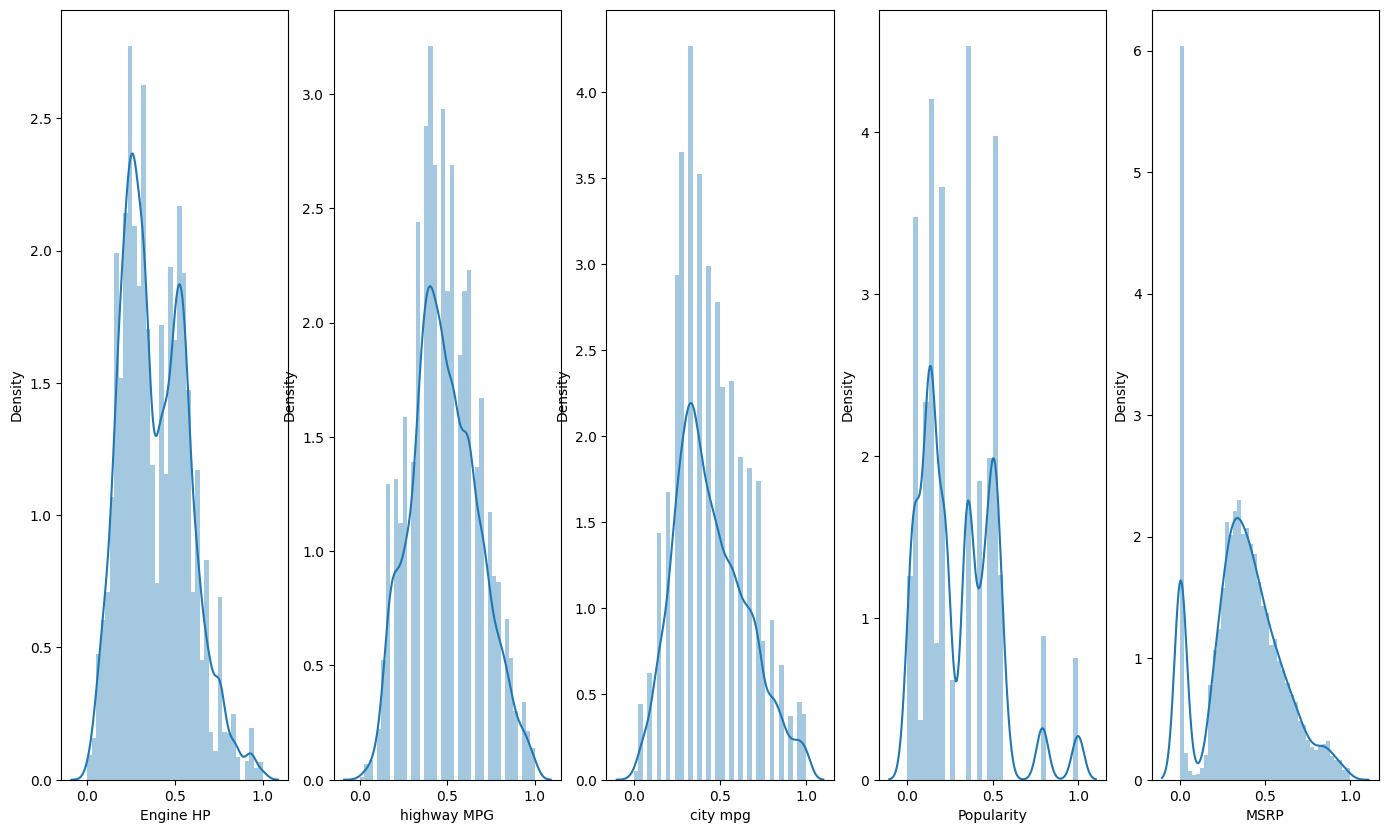

In [51]:
fig, ax = plt.subplots(1, 5, figsize=(17, 10))
sns.distplot(df['Engine HP'], ax=ax[0])
sns.distplot(df['highway MPG'], ax=ax[1])
sns.distplot(df['city mpg'], ax=ax[2])
sns.distplot(df['Popularity'], ax=ax[3])
sns.distplot(df['MSRP'], ax=ax[4])

plt.show()

# **Model Building**

#### **Model Training**

In [52]:
#Splitting data into target and features

x = df.drop('MSRP',axis=1)
y = df['MSRP']

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x.values,y,test_size=0.2,random_state=42)


In [ ]:
pip install catboost

In [55]:
#Importing Modules for models

from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

In [56]:
models1={
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'MLP Regressor': MLPRegressor(),
    'SVM':SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'CatBoost Regressor':CatBoostRegressor(verbose=0),
    'Random Forest':RandomForestRegressor()
}

In [57]:
for name,model in models1.items():
    model.fit(x_train,y_train)
    print(name + ' trained')

Linear Regression trained
Lasso Regression trained
Ridge Regression trained
MLP Regressor trained
SVM trained
Decision Tree trained
Gradient Boosting Regressor trained
CatBoost Regressor trained
Random Forest trained


### **Model Evaluation**

In [58]:
#Import Evaluation Scores
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score as r2

In [59]:
def get_rmse(y_true,y_pred):
    rmse = np.sqrt(np.mean((y_true-y_pred)**2))
    return rmse

In [60]:
#MSE
for name,model in models1.items():
    y_pred = model.predict(x_test)
    rmse = get_rmse(y_test,y_pred)
    print(name + ' RMSE: {:.5f}'.format(rmse))

Linear Regression RMSE: 0.10852
Lasso Regression RMSE: 0.21279
Ridge Regression RMSE: 0.10858
MLP Regressor RMSE: 0.12930
SVM RMSE: 0.17801
Decision Tree RMSE: 0.05095
Gradient Boosting Regressor RMSE: 0.06088
CatBoost Regressor RMSE: 0.04144
Random Forest RMSE: 0.04553


In [61]:
#MAE
for name, model in models1.items():
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(name + ' MAE: {:.5f}'.format(mae))

Linear Regression MAE: 0.08393
Lasso Regression MAE: 0.16786
Ridge Regression MAE: 0.08402
MLP Regressor MAE: 0.09977
SVM MAE: 0.13944
Decision Tree MAE: 0.03353
Gradient Boosting Regressor MAE: 0.04336
CatBoost Regressor MAE: 0.02957
Random Forest MAE: 0.03116


In [62]:
#R2 Score
from sklearn.metrics import r2_score

def get_r2(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    return r2

In [63]:
for name,model in models1.items():
    y_pred = model.predict(x_test)
    r2 = get_r2(y_test,y_pred)
    print(name + ' R2: {:.5f}'.format(r2))

Linear Regression R2: 0.77835
Lasso Regression R2: 0.14773
Ridge Regression R2: 0.77808
MLP Regressor R2: 0.68530
SVM R2: 0.40354
Decision Tree R2: 0.95114
Gradient Boosting Regressor R2: 0.93023
CatBoost Regressor R2: 0.96768
Random Forest R2: 0.96099


# **Fine Tuning**

In [64]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [65]:
# Define the parameter grid for grid search
parameters = {
    'depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'l2_leaf_reg': [1, 3, 5],
    'iterations': [100, 200, 300]
}

### **Grid Search**

In [66]:
catboost_model = CatBoostRegressor()

#Grid search
grid_search = GridSearchCV(catboost_model, parameters, cv=5)
grid_search.fit(x, y)

Streaming output truncated to the last 5000 lines.
100:	learn: 0.2077335	total: 381ms	remaining: 751ms
101:	learn: 0.2075734	total: 384ms	remaining: 746ms
102:	learn: 0.2074151	total: 387ms	remaining: 741ms
103:	learn: 0.2072542	total: 391ms	remaining: 736ms
104:	learn: 0.2071045	total: 394ms	remaining: 732ms
105:	learn: 0.2069426	total: 397ms	remaining: 727ms
106:	learn: 0.2067788	total: 401ms	remaining: 723ms
107:	learn: 0.2066211	total: 404ms	remaining: 718ms
108:	learn: 0.2064678	total: 407ms	remaining: 714ms
109:	learn: 0.2063045	total: 410ms	remaining: 709ms
110:	learn: 0.2061539	total: 414ms	remaining: 704ms
111:	learn: 0.2059929	total: 417ms	remaining: 700ms
112:	learn: 0.2058309	total: 420ms	remaining: 695ms
113:	learn: 0.2056710	total: 423ms	remaining: 691ms
114:	learn: 0.2055133	total: 427ms	remaining: 687ms
115:	learn: 0.2053525	total: 430ms	remaining: 682ms
116:	learn: 0.2051971	total: 433ms	remaining: 678ms
117:	learn: 0.2050390	total: 437ms	remaining: 674ms
118:	learn: 0

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x7f6434676740>,
             param_grid={'depth': [3, 5, 7], 'iterations': [100, 200, 300],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.1, 0.01, 0.001]})

In [67]:
#Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params)
print(best_score)

{'depth': 5, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
0.878922536364372


### **Randomized Search**

In [68]:
#Randomized Search

random_search = RandomizedSearchCV(catboost_model, parameters, cv=5)
random_search.fit(x, y)

Streaming output truncated to the last 5000 lines.
0:	learn: 0.2193376	total: 2.35ms	remaining: 467ms
1:	learn: 0.2176795	total: 5.82ms	remaining: 576ms
2:	learn: 0.2159496	total: 8.32ms	remaining: 546ms
3:	learn: 0.2142850	total: 10.5ms	remaining: 515ms
4:	learn: 0.2125959	total: 12.9ms	remaining: 504ms
5:	learn: 0.2109349	total: 15.1ms	remaining: 488ms
6:	learn: 0.2092899	total: 17.6ms	remaining: 487ms
7:	learn: 0.2077038	total: 20ms	remaining: 481ms
8:	learn: 0.2060731	total: 22.9ms	remaining: 485ms
9:	learn: 0.2045464	total: 24.9ms	remaining: 474ms
10:	learn: 0.2030641	total: 27.9ms	remaining: 479ms
11:	learn: 0.2015397	total: 30.3ms	remaining: 474ms
12:	learn: 0.1999614	total: 32.5ms	remaining: 467ms
13:	learn: 0.1984746	total: 34.7ms	remaining: 461ms
14:	learn: 0.1969521	total: 37.1ms	remaining: 457ms
15:	learn: 0.1955068	total: 39.7ms	remaining: 456ms
16:	learn: 0.1940253	total: 41.9ms	remaining: 452ms
17:	learn: 0.1925653	total: 44.1ms	remaining: 446ms
18:	learn: 0.1911348	tota

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x7f6434676740>,
                   param_distributions={'depth': [3, 5, 7],
                                        'iterations': [100, 200, 300],
                                        'l2_leaf_reg': [1, 3, 5],
                                        'learning_rate': [0.1, 0.01, 0.001]})

In [69]:
#Best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_
print(best_params)
print(best_score)

{'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 200, 'depth': 5}
0.8769455258298088


In [70]:
best_model = CatBoostRegressor(**best_params)
best_model.fit(x, y)

0:	learn: 0.2063625	total: 3.28ms	remaining: 652ms
1:	learn: 0.1912371	total: 5.68ms	remaining: 562ms
2:	learn: 0.1772231	total: 7.87ms	remaining: 517ms
3:	learn: 0.1653351	total: 10.2ms	remaining: 498ms
4:	learn: 0.1548945	total: 16ms	remaining: 623ms
5:	learn: 0.1456165	total: 18.3ms	remaining: 590ms
6:	learn: 0.1371754	total: 20.5ms	remaining: 567ms
7:	learn: 0.1298326	total: 22.7ms	remaining: 546ms
8:	learn: 0.1231673	total: 25.3ms	remaining: 537ms
9:	learn: 0.1175703	total: 27.5ms	remaining: 523ms
10:	learn: 0.1119730	total: 29.8ms	remaining: 512ms
11:	learn: 0.1076517	total: 32.7ms	remaining: 513ms
12:	learn: 0.1036802	total: 36.9ms	remaining: 530ms
13:	learn: 0.1004177	total: 40.5ms	remaining: 539ms
14:	learn: 0.0972751	total: 44.3ms	remaining: 546ms
15:	learn: 0.0943183	total: 48.1ms	remaining: 554ms
16:	learn: 0.0918878	total: 51.8ms	remaining: 557ms
17:	learn: 0.0894753	total: 54.6ms	remaining: 552ms
18:	learn: 0.0873209	total: 58.1ms	remaining: 553ms
19:	learn: 0.0853882	tot

In [71]:
from sklearn.metrics import mean_squared_error, r2_score
model = best_model.fit(x_train,y_train)

# Predictions on the test data
y_pred = model.predict(x_test)

#MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

#R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

0:	learn: 0.2047075	total: 3.29ms	remaining: 654ms
1:	learn: 0.1899444	total: 11.8ms	remaining: 1.17s
2:	learn: 0.1760753	total: 13.9ms	remaining: 913ms
3:	learn: 0.1644280	total: 16ms	remaining: 785ms
4:	learn: 0.1540512	total: 18.4ms	remaining: 719ms
5:	learn: 0.1448071	total: 20.5ms	remaining: 663ms
6:	learn: 0.1368389	total: 22.5ms	remaining: 619ms
7:	learn: 0.1298483	total: 25.7ms	remaining: 617ms
8:	learn: 0.1232740	total: 27.8ms	remaining: 590ms
9:	learn: 0.1177061	total: 29.7ms	remaining: 564ms
10:	learn: 0.1122418	total: 32ms	remaining: 551ms
11:	learn: 0.1077736	total: 34.3ms	remaining: 538ms
12:	learn: 0.1040870	total: 36.5ms	remaining: 524ms
13:	learn: 0.1004423	total: 38.6ms	remaining: 512ms
14:	learn: 0.0972965	total: 40.7ms	remaining: 502ms
15:	learn: 0.0945906	total: 42.7ms	remaining: 491ms
16:	learn: 0.0922606	total: 45.1ms	remaining: 485ms
17:	learn: 0.0898516	total: 47.1ms	remaining: 476ms
18:	learn: 0.0878526	total: 49.2ms	remaining: 469ms
19:	learn: 0.0859377	total

In [72]:
from catboost import CatBoostRegressor 
from sklearn.metrics import r2_score
cat = CatBoostRegressor()
mod = cat.fit(x_train, y_train)
#Predictions on the test set
y_pred = mod.predict(x_test)

#R2 score
r2 = r2_score(y_test, y_pred)

print("R^2 score:", r2)

Learning rate set to 0.056604
0:	learn: 0.2120053	total: 9.28ms	remaining: 9.27s
1:	learn: 0.2028704	total: 16.9ms	remaining: 8.43s
2:	learn: 0.1942662	total: 20.4ms	remaining: 6.79s
3:	learn: 0.1865399	total: 23.3ms	remaining: 5.8s
4:	learn: 0.1791455	total: 27.8ms	remaining: 5.54s
5:	learn: 0.1720456	total: 35.6ms	remaining: 5.9s
6:	learn: 0.1653567	total: 39.5ms	remaining: 5.6s
7:	learn: 0.1594854	total: 43.7ms	remaining: 5.41s
8:	learn: 0.1537627	total: 46.9ms	remaining: 5.16s
9:	learn: 0.1483696	total: 50.1ms	remaining: 4.96s
10:	learn: 0.1429949	total: 54.5ms	remaining: 4.9s
11:	learn: 0.1381159	total: 58.2ms	remaining: 4.79s
12:	learn: 0.1337003	total: 64.3ms	remaining: 4.88s
13:	learn: 0.1295444	total: 67.7ms	remaining: 4.76s
14:	learn: 0.1254051	total: 70.3ms	remaining: 4.62s
15:	learn: 0.1217832	total: 73.7ms	remaining: 4.53s
16:	learn: 0.1184470	total: 76.5ms	remaining: 4.42s
17:	learn: 0.1150632	total: 80ms	remaining: 4.37s
18:	learn: 0.1119900	total: 83.4ms	remaining: 4.3s